In [2]:
!pip install yfinance pandas



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 6.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-macosx_11_0_arm64.whl size=264228 sha256=f55e6b07cd9444ebeaccc428095dc169d2522b823e1ca78c8f0546f765890e55
  Stored in directory: /Users/mithil/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


In [8]:
import yfinance as yf
import pandas as pd

# Fetch historical data for a specific stock
ticker = 'AAPL'
data = yf.download(ticker, start='1995-01-01', end='2024-12-20')
data.to_csv(f'{ticker}_historical_data.csv')


[*********************100%***********************]  1 of 1 completed


In [25]:
import pandas as pd

# Load the data
data = pd.read_csv('AAPL_historical_data.csv')

# Display the first few rows to inspect the data
print(data.head())

# Clean the data by removing the first row (which contains unwanted text values)
data = data.drop(0)
data = data.drop(1)
# Rename columns for consistency
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Use ffill() method to handle missing values
data.ffill(inplace=True)

# Verify the cleaned data
print(data.head())
# Save the cleaned data to a new CSV file
data.to_csv('AAPL_cleaned_data.csv')

# Verify the cleaned data and confirm that it was saved
print("Data saved to 'AAPL_cleaned_data.csv'.")

        Price               Close                High                  Low  \
0      Ticker                AAPL                AAPL                 AAPL   
1        Date                 NaN                 NaN                  NaN   
2  1995-01-03   0.285765677690506  0.2894887703953436  0.28204258498566837   
3  1995-01-04  0.2932125926017761  0.2950741257923262  0.28762712307349875   
4  1995-01-05  0.2894887924194336  0.2932127305086422  0.28855801295843286   

                  Open     Volume  
0                 AAPL       AAPL  
1                  NaN        NaN  
2   0.2894887703953436  103868800  
3  0.28762712307349875  158681600  
4  0.29228110594652057   73640000  
                         Close                High                  Low  \
Date                                                                      
1995-01-03   0.285765677690506  0.2894887703953436  0.28204258498566837   
1995-01-04  0.2932125926017761  0.2950741257923262  0.28762712307349875   
1995-01-05  0.2

In [27]:
print(data.isnull().sum())

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [29]:
print(data.duplicated().sum())  # Count duplicate rows
data = data[~data.duplicated()]  # Remove duplicates if any


0


In [31]:
# Ensure the 'Date' column is of datetime type
data.index = pd.to_datetime(data.index)

# Check data types to verify
print(data.dtypes)


Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


In [33]:
import pandas as pd

# Load the cleaned data
data = pd.read_csv('AAPL_cleaned_data.csv', index_col='Date', parse_dates=True)

# Convert relevant columns to numeric
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Check the first few rows to verify the conversion
print(data.head())


               Close      High       Low      Open      Volume
Date                                                          
1995-01-03  0.285766  0.289489  0.282043  0.289489   103868800
1995-01-04  0.293213  0.295074  0.287627  0.287627   158681600
1995-01-05  0.289489  0.293213  0.288558  0.292281    73640000
1995-01-06  0.312760  0.321137  0.306244  0.309967  1076622400
1995-01-09  0.306826  0.311829  0.305313  0.309967   274086400


In [35]:

# Check data types to verify
print(data.dtypes)

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


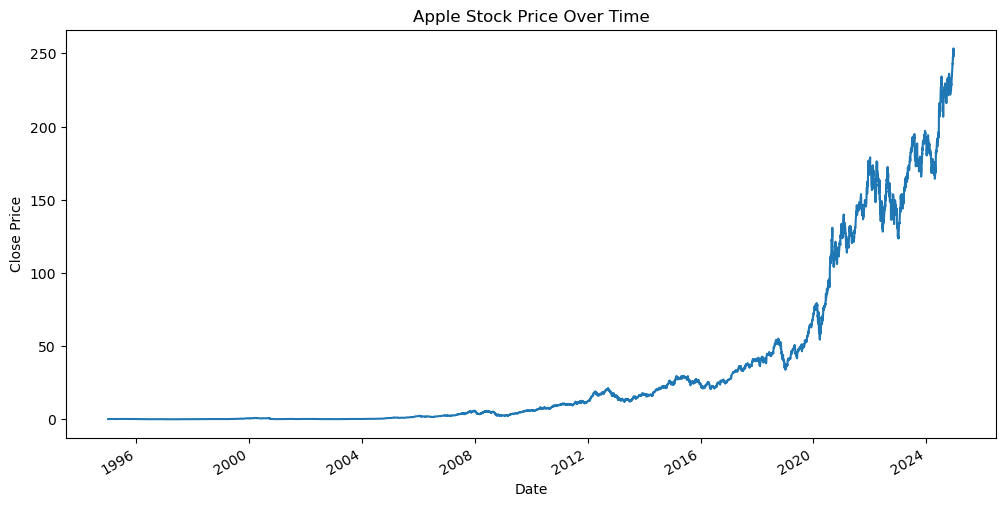

In [37]:
import matplotlib.pyplot as plt

# Plot the 'Close' price over time
data['Close'].plot(figsize=(12, 6))
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


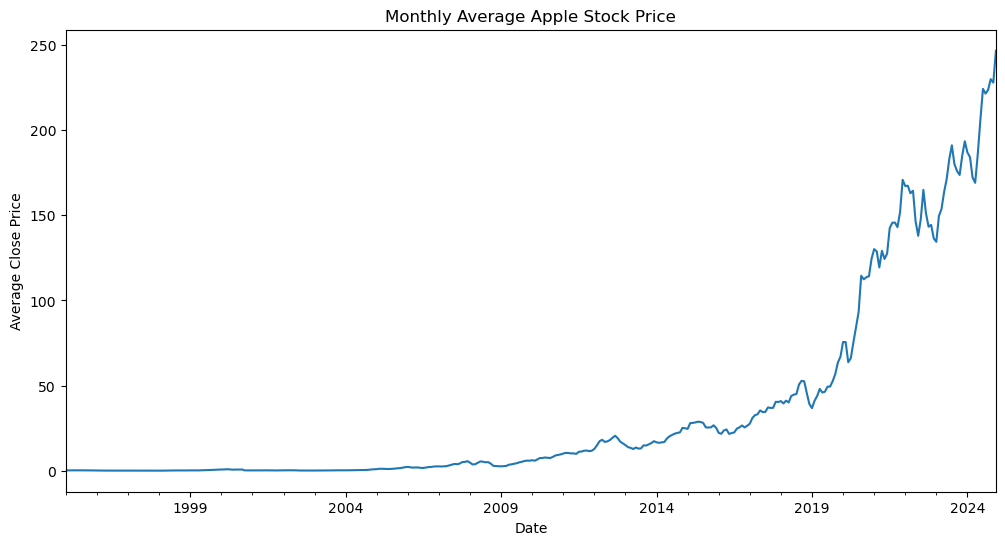

In [41]:
# Resample the data to monthly frequency, using the 'Close' price
monthly_data = data['Close'].resample('ME').mean()

# Plot the resampled data
monthly_data.plot(figsize=(12, 6))
plt.title('Monthly Average Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.show()


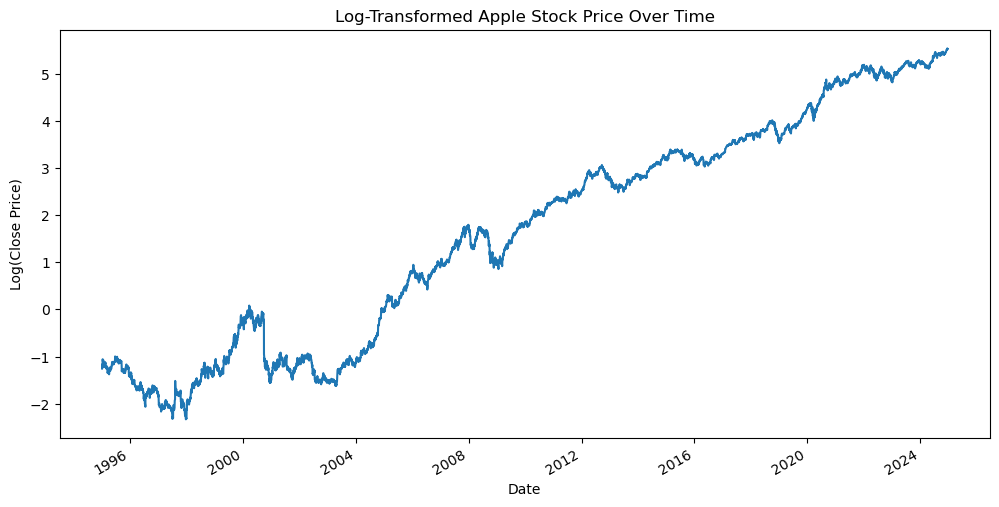

In [43]:
import numpy as np

# Apply log transformation to 'Close' prices
data['Log_Close'] = np.log(data['Close'])

# Plot the log-transformed data
data['Log_Close'].plot(figsize=(12, 6))
plt.title('Log-Transformed Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log(Close Price)')
plt.show()


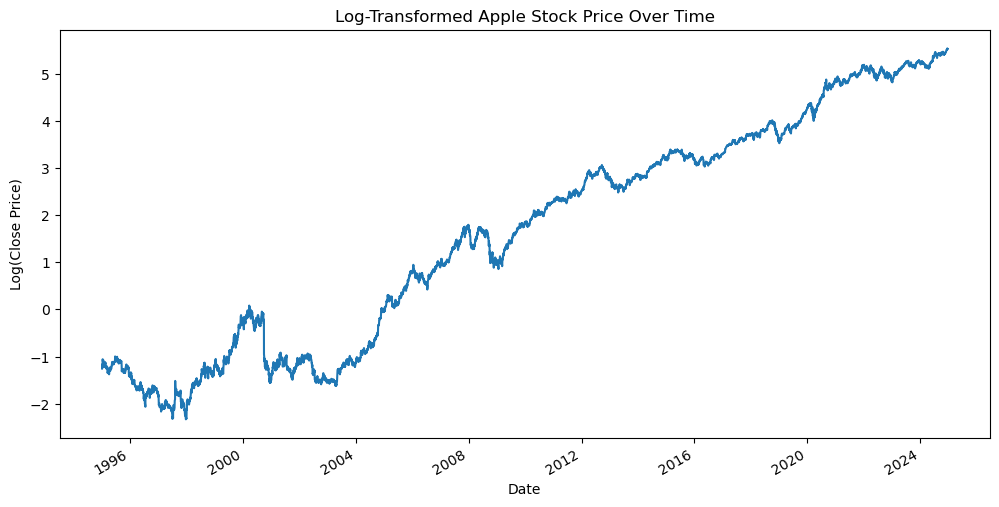

In [45]:
 import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation to 'Close' prices
data['Log_Close'] = np.log(data['Close'])

# Plot the log-transformed data
data['Log_Close'].plot(figsize=(12, 6))
plt.title('Log-Transformed Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log(Close Price)')
plt.show()


In [47]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity
adf_result = adfuller(data['Log_Close'].dropna())

# Display ADF Statistic and p-value
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Additional information (optional)
print(f'Critical Values: {adf_result[4]}')
print(f'In summary: {"Stationary" if adf_result[1] < 0.05 else "Non-stationary"}')


ADF Statistic: 0.14043581707614153
p-value: 0.9687158361016257
Critical Values: {'1%': -3.4312187291656544, '5%': -2.8619239127477236, '10%': -2.5669743523295043}
In summary: Non-stationary


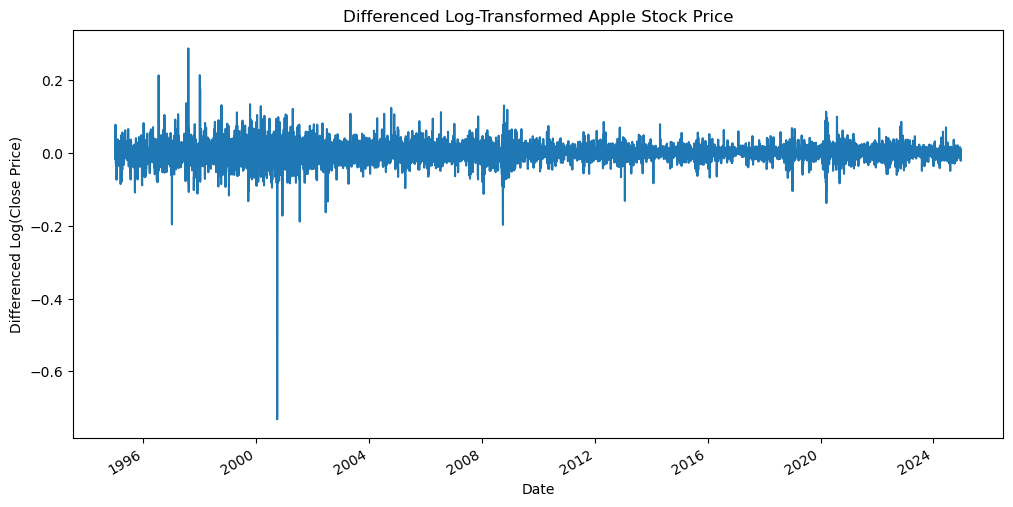

In [49]:
# Apply first-order differencing
data['Log_Close_Diff'] = data['Log_Close'].diff()

# Plot the differenced data
data['Log_Close_Diff'].plot(figsize=(12, 6))
plt.title('Differenced Log-Transformed Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Differenced Log(Close Price)')
plt.show()
